In [1]:
import numpy as np
from scipy import stats

# Sample data
data = np.random.normal(50, 5, 100)

# Calculate the sample mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Calculate the standard error
std_error = std_dev / np.sqrt(len(data))

# Calculate the margin of error
margin_of_error = stats.t.ppf(0.975, len(data)-1) * std_error

# Calculate the confidence interval
lower_ci = mean - margin_of_error
upper_ci = mean + margin_of_error

print("95% Confidence Interval:", (lower_ci, upper_ci))


95% Confidence Interval: (48.817797646158404, 50.82599262195304)


In [3]:
import numpy as np
from scipy import stats

# Observed frequencies
obs_freq = np.array([25, 18, 17, 11, 12, 17])  # blue, orange, green, yellow, red, brown

# Expected frequencies (assuming a total count of 100)
exp_freq = np.array([20, 20, 20, 10, 10, 20]) 

# Calculate the degrees of freedom
df = len(obs_freq) - 1

# Calculate the chi-square statistic and p-value
chi2_stat, p_value = stats.chisquare(obs_freq, exp_freq)

# Compare the p-value to the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Fail to reject the null hypothesis.
Chi-square statistic: 2.85
P-value: 0.7230980669678346


In [5]:
import numpy as np
from scipy import stats

# Create the contingency table
contingency_table = np.array([[20, 15],
                              [10, 25],
                              [15, 20]])

# Calculate the chi-square statistic and p-value
chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)


Chi-square statistic: 5.833333333333334
P-value: 0.05411376622282158


In [6]:
import numpy as np
from scipy import stats

# Sample size
n = 500

# Number of smokers in the sample
x = 60

# Sample proportion of smokers
p = x/n

# Calculate the standard error
se = np.sqrt(p*(1-p)/n)

# Calculate the 95% confidence interval
z = stats.norm.ppf(0.975) # z-score for 95% confidence level
lower_ci = p - z*se
upper_ci = p + z*se

# Print the results
print("Sample proportion of smokers:", p)
print("95% Confidence interval: ({:.4f}, {:.4f})".format(lower_ci, upper_ci))


Sample proportion of smokers: 0.12
95% Confidence interval: (0.0915, 0.1485)


Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
of 12 using Python. Interpret the results.

In [7]:
import numpy as np
from scipy import stats

# Sample mean
x = 75

# Sample standard deviation
s = 12

# Sample size
n = 100

# Calculate the standard error
se = s / np.sqrt(n)

# Calculate the 90% confidence interval
t = stats.t.ppf(0.95, n-1) # t-score for 90% confidence level
lower_ci = x - t*se
upper_ci = x + t*se

# Print the results
print("Sample mean:", x)
print("90% Confidence interval: ({:.4f}, {:.4f})".format(lower_ci, upper_ci))


Sample mean: 75
90% Confidence interval: (73.0075, 76.9925)


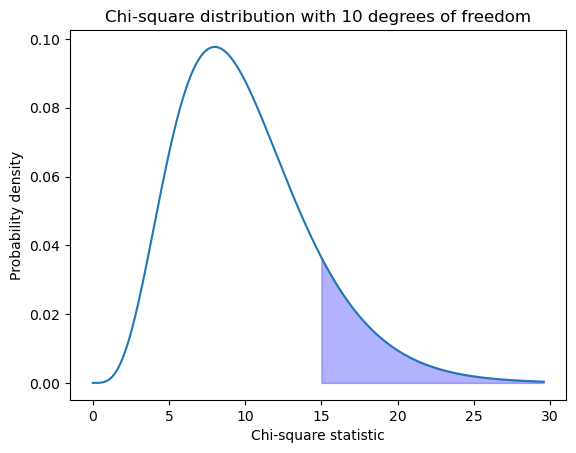

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set the degrees of freedom
df = 10

# Generate a range of x values for the chi-square distribution
x = np.linspace(0, stats.chi2.ppf(0.999, df), 1000)

# Create the plot
fig, ax = plt.subplots()

# Plot the chi-square distribution
ax.plot(x, stats.chi2.pdf(x, df))

# Shade the area corresponding to a chi-square statistic of 15
x_fill = np.linspace(15, stats.chi2.ppf(0.999, df), 1000)
ax.fill_between(x_fill, stats.chi2.pdf(x_fill, df), color='blue', alpha=0.3)

# Add labels and a title
ax.set_xlabel('Chi-square statistic')
ax.set_ylabel('Probability density')
ax.set_title('Chi-square distribution with 10 degrees of freedom')

# Show the plot
plt.show()


Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
prefer Coke.

In [9]:
import statsmodels.stats.proportion as smp

# Set the sample size and number of people who preferred Coke
n = 1000
x = 520

# Calculate the sample proportion
p_hat = x / n

# Set the confidence level
alpha = 0.01

# Calculate the confidence interval
lower, upper = smp.proportion_confint(x, n, alpha=alpha, method='normal')

# Print the results
print(f"99% Confidence Interval: ({lower}, {upper})")


99% Confidence Interval: (0.4793051576779699, 0.5606948423220302)


Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
expected frequencies of a fair coin. Use a significance level of 0.05.

In [10]:
import numpy as np
from scipy.stats import chisquare

# Define the expected frequencies for a fair coin
n = 100
p = 0.5
expected_freq = np.array([n*p, n*(1-p)])

# Define the observed frequencies
observed_freq = np.array([n-45, 45])

# Calculate the chi-square statistic and p-value
chi2_statistic, p_value = chisquare(observed_freq, f_exp=expected_freq)

# Print the results
print(f"Chi-square Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

# Check if the result is significant at the 0.05 level
alpha = 0.05
if p_value < alpha:
    print("The result is statistically significant at the 0.05 level")
else:
    print("The result is not statistically significant at the 0.05 level")


Chi-square Statistic: 1.0
P-value: 0.31731050786291115
The result is not statistically significant at the 0.05 level


Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
significance level of 0.05.

In [12]:
import numpy as np
from scipy.stats import t

# Define the sample size, sample mean, and sample standard deviation
n = 30
sample_mean = 72
sample_std = 10

# Define the null hypothesis mean and significance level
null_mean = 70
alpha = 0.05

# Calculate the t-statistic and degrees of freedom
t_stat = (sample_mean - null_mean) / (sample_std / np.sqrt(n))
dof = n - 1

# Calculate the p-value
p_value = (1 - t.cdf(abs(t_stat), dof)) * 2

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the result is significant at the 0.05 level
if p_value < alpha:
    print("Reject the null hypothesis. The population mean is significantly different from 70.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the population mean is significantly different from 70.")


T-statistic: 1.0954451150103321
P-value: 0.2823362372860698
Fail to reject the null hypothesis. There is not enough evidence to conclude that the population mean is significantly different from 70.
